# Handling Mixed Variables

In [1]:
# sometimes we get mixed data while doing machine learning
# mixed data means or column will have both numerical and categorical data
# one way of this data is - B5, C23, D41 => one way to handle is one column of categorical - B,C,D and other column 5,23,41 - efficient way 
# or single column of both as 7 3 1 A C ... but this way is inefficient 

In [2]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('titanic.csv')

In [10]:
df.head()

,cabin,ticket,number,survived
0,NaN,A/5 21171,A,0
1,C85,PC 17599,6,1
2,NaN,STON/O2. 3101282,A,1
3,C123,113803,2,1
4,NaN,373450,A,0


In [11]:
df['number'].unique()

array(['A', '6', '2', '5', '4', '1', '3'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

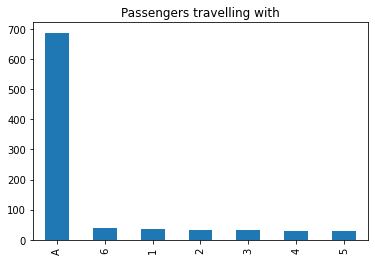

In [12]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [15]:
#extract numerical part - to extract the numerical part of the data like 1,2,A,...
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [16]:
#extract categorical part

In [19]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)
df.head()

,cabin,ticket,number,survived,number_numerical,number_categorical
0,NaN,A/5 21171,A,0,NaN,A
1,C85,PC 17599,6,1,6.0,NaN
2,NaN,STON/O2. 3101282,A,1,NaN,A
3,C123,113803,2,1,2.0,NaN
4,NaN,373450,A,0,NaN,A


In [20]:
#hence i handled a column which was like 1 2 3 A B ... means categorical and numrical in one column

In [21]:
#now i will handle the column like cabin and ticket in which i have B12, H34, etc

In [23]:
df['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
df['ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [27]:
df['cabin_num'] = df['cabin'].str.extract('(\d+)') #captures numerical part
df['cabin_cat'] = df['cabin'].str[0] #captures the first letter

df.head()

,cabin,ticket,number,survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,A,0,NaN,A,NaN,NaN
1,C85,PC 17599,6,1,6.0,NaN,85,C
2,NaN,STON/O2. 3101282,A,1,NaN,A,NaN,NaN
3,C123,113803,2,1,2.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<AxesSubplot:>

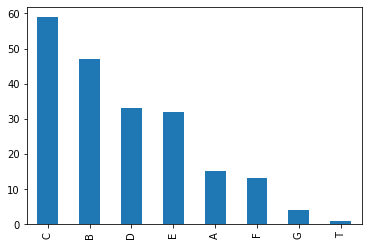

In [29]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [31]:
# extract the last bit of ticket as number
df['ticket_num'] = df['ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                 errors='coerce',
                                 downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])

df.head(20)

,cabin,ticket,number,survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,A,0,NaN,A,NaN,NaN,21171.0,A/5
1,C85,PC 17599,6,1,6.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,A,1,NaN,A,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,2,1,2.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,A,0,NaN,A,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,A,0,NaN,A,NaN,NaN,349909.0,NaN
8,NaN,347742,A,1,NaN,A,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN
